# 💳 Credit Card Approval Prediction

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.

We're going to take following approach:

* Problem defination
* Data
* Evaluation
* Features
* Modelling
* Expermentation


## 1. Problem Defination

In a statement

> Predict a random application to know whether he/she is a "good" client or a "bad" client. 

## 2. Data

The data has been collected through kaggle datasets: https://www.kaggle.com/rikdifos/credit-card-approval-prediction/tasks?taskId=1416

## 3. Evaluation

> If you can reach 95% accuracy out predicting whether a client is good or bad. We'll definately consider this project. and in addition to that we have to also apply vinatage analysis:https://www.listendata.com/2019/09/credit-risk-vintage-analysis.html

## 4. Features

This is where you'll get different information about features in your data:

> Application_record.csv		

 Feature name	        Explanation	                                               Remarks 

ID	                    Client number	

CODE_GENDER	            Gender	

FLAG_OWN_CAR	        Is there a car	

FLAG_OWN_REALTY	        Is there a property	

CNT_CHILDREN	        Number of children	

AMT_INCOME_TOTAL	    Annual income	

NAME_INCOME_TYPE	    Income category	

NAME_EDUCATION_TYPE	    Education level	

NAME_FAMILY_STATUS	    Marital status	

NAME_HOUSING_TYPE	    Way of living	

DAYS_BIRTH	            Birthday	                                      Count backwards from current day (0), -1     
                                                                          means yesterday

DAYS_EMPLOYED	       Start date of employment	                          Count backwards from current day(0). If                                                                               positive, it means the person currently                                                                               unemployed.
FLAG_MOBIL	           Is there a mobile phone	

FLAG_WORK_PHONE	       Is there a work phone	

FLAG_PHONE	           Is there a phone	

FLAG_EMAIL	           Is there an email	

OCCUPATION_TYPE	       Occupation	

CNT_FAM_MEMBERS	       Family size	


> Credit_record.csv		

Feature name	       Explanation	                                                    Remarks

ID	                   Client number	

MONTHS_BALANCE	       Record month	                                       The month of the extracted data is the                                                                                starting point, backwards, 0 is the current                                                                            month, -1 is the previous month, and so on


STATUS	               Status	                                           0: 1-29 days past due 1: 30-59 days past                                                                              due 2: 60-89 days overdue 3: 90-119 days                                                                              overdue 4: 120-149 days overdue 5: Overdue                                                                            or bad debts, write-offs for more than 150                                                                            days C: paid off that month X: No loan for                                                                            the month



In [1]:
%matplotlib inline

In [82]:
# Regular EDA (Exploratory Data Analysis) and plotting libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


### **Load Data**

In [3]:
df=pd.read_csv("application_record.csv")
df1=pd.read_csv("credit_record.csv")

In [4]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
df1.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
len(df1)

1048575

In [7]:
len(df
   )

438557

In [68]:
final_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   CODE_GENDER                     438557 non-null  int8   
 1   FLAG_OWN_CAR                    438557 non-null  int8   
 2   FLAG_OWN_REALTY                 438557 non-null  int8   
 3   CNT_CHILDREN                    438557 non-null  int64  
 4   AMT_INCOME_TOTAL                438557 non-null  float64
 5   NAME_INCOME_TYPE                438557 non-null  int8   
 6   NAME_EDUCATION_TYPE             438557 non-null  int8   
 7   NAME_FAMILY_STATUS              438557 non-null  int8   
 8   NAME_HOUSING_TYPE               438557 non-null  int8   
 9   DAYS_BIRTH                      438557 non-null  int64  
 10  DAYS_EMPLOYED                   438557 non-null  int64  
 11  FLAG_WORK_PHONE                 438557 non-null  int64  
 12  FLAG_PHONE      

In [8]:
data=df1[:438557]

In [9]:
data.shape

(438557, 3)

In [10]:
len(df)

438557

In [11]:
final_data = pd.concat([df,data],axis=1)
final_data.head().T

,0,1,2,3,4
ID,5008804,5008805,5008806,5008808,5008809
CODE_GENDER,M,M,M,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500,427500,112500,270000,270000
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment


In [12]:
final_data.shape

(438557, 21)

In [13]:
final_data.isnull().sum(
)

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
ID                          0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [14]:
final_data.drop('ID',axis=1,inplace=True)

In [15]:
final_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,X
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-3,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,C


In [16]:
# su = final_data.rename(columns={final_data.columns[0]: 'new_id'})

In [17]:
# final_data=dd`su.drop('new_id',axis=1,inplace=True)

In [18]:
# original_data=final_data.drop('ID',axis=1,inplace=True)

In [19]:
final_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,X
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-3,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,C


In [20]:
final_data.isnull().sum()

CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [21]:
final_data['OCCUPATION_TYPE'].value_counts()


Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [22]:
final_data['FLAG_MOBIL'].value_counts()

1    438557
Name: FLAG_MOBIL, dtype: int64

In [23]:
# final_data.AMT_INCOME_TOTAL.plot.hist();

In [24]:
final_data.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
CNT_CHILDREN,1.000000,0.019177,0.349088,-0.241535,NaN,0.038418,-0.038266,0.028457,0.884781,0.004846
AMT_INCOME_TOTAL,0.019177,1.000000,0.053775,-0.141291,NaN,-0.033635,0.004444,0.112139,0.011454,0.006583
DAYS_BIRTH,0.349088,0.053775,1.000000,-0.617908,NaN,0.171829,-0.037984,0.096752,0.306179,0.003572
DAYS_EMPLOYED,-0.241535,-0.141291,-0.617908,1.000000,NaN,-0.232208,0.004868,-0.074372,-0.234373,-0.004195
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.038418,-0.033635,0.171829,-0.232208,NaN,1.000000,0.290066,-0.060915,0.049777,0.000215
FLAG_PHONE,-0.038266,0.004444,-0.037984,0.004868,NaN,0.290066,1.000000,-0.001170,-0.024213,-0.004199
FLAG_EMAIL,0.028457,0.112139,0.096752,-0.074372,NaN,-0.060915,-0.001170,1.000000,0.022054,0.001158
CNT_FAM_MEMBERS,0.884781,0.011454,0.306179,-0.234373,NaN,0.049777,-0.024213,0.022054,1.000000,0.002888
MONTHS_BALANCE,0.004846,0.006583,0.003572,-0.004195,NaN,0.000215,-0.004199,0.001158,0.002888,1.000000


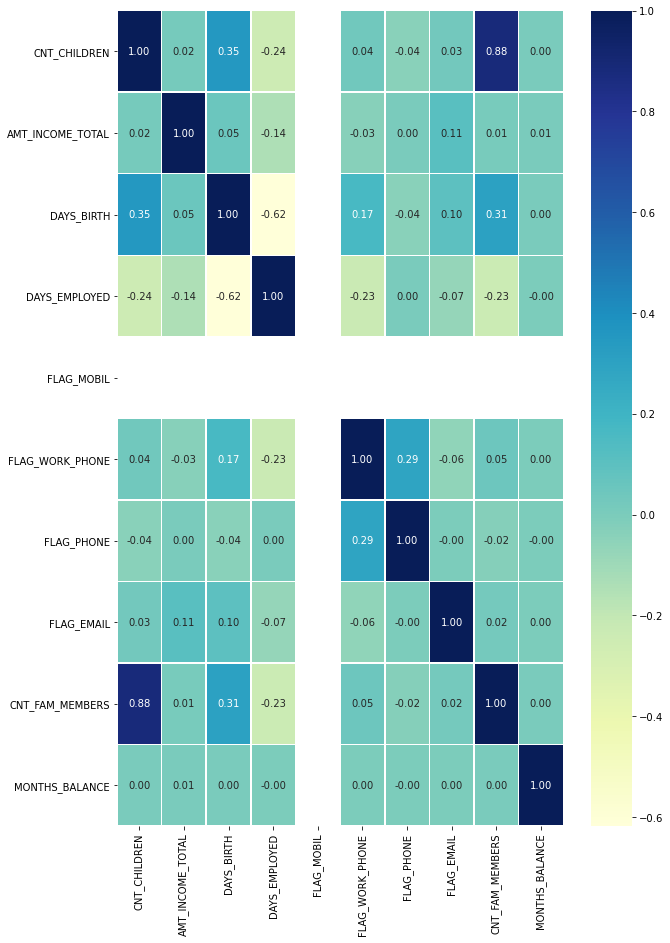

In [25]:
corr_mat = final_data.corr()
fig,ax = plt.subplots(figsize=[10,15])
ax=sns.heatmap(corr_mat,
               annot = True,
               linewidths = 0.5,
               fmt = (".2f"),
               cmap = "YlGnBu");

In [26]:
final_data.drop('FLAG_MOBIL',axis=1,inplace=True)

In [27]:
final_data.shape


(438557, 18)

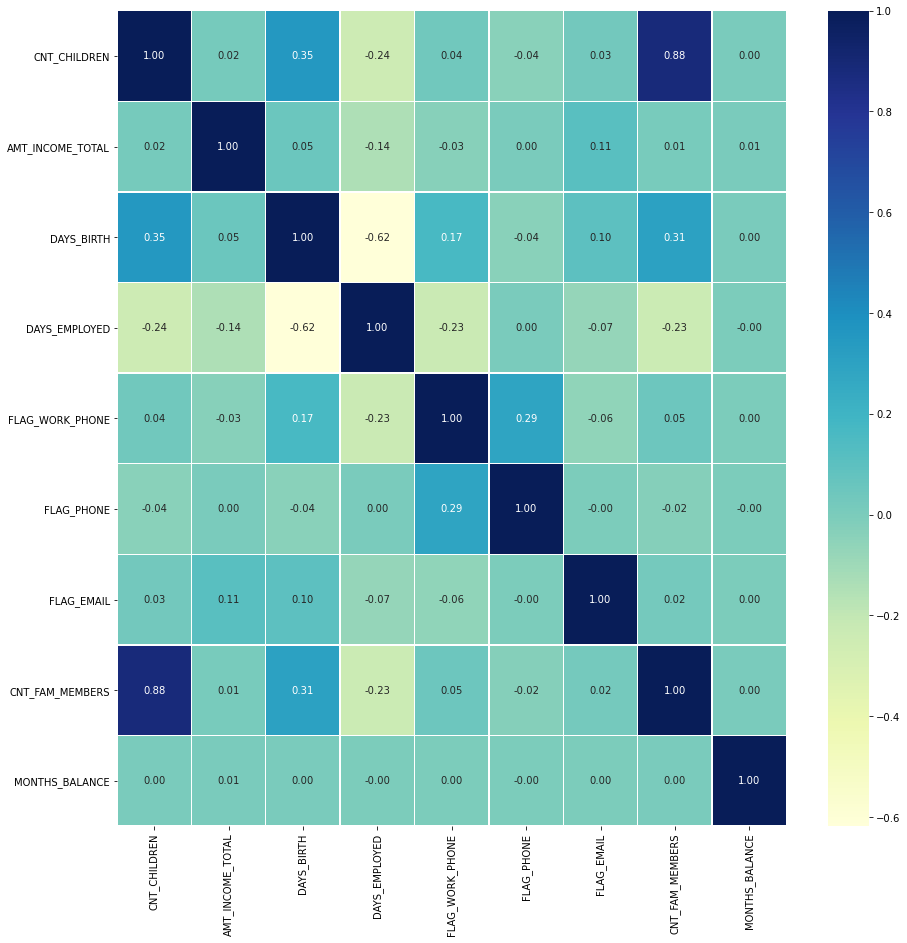

In [28]:
corr_mat = final_data.corr()
fig,ax = plt.subplots(figsize=[15,15])
ax=sns.heatmap(corr_mat,
               annot = True,
               linewidths = 0.5,
               fmt = (".2f"),
               cmap = "YlGnBu");

## Let's make our string columns to integer value


In [29]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,438557.0,0.427390,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,187524.286010,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-15997.904649,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,60563.675328,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_WORK_PHONE,438557.0,0.206133,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,0.287771,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,0.108207,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465,0.897207,1.0,2.0,2.0,3.0,20.0
MONTHS_BALANCE,438557.0,-19.162597,14.030527,-60.0,-29.0,-17.0,-7.0,0.0


In [30]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          438557 non-null  object 
 1   FLAG_OWN_CAR         438557 non-null  object 
 2   FLAG_OWN_REALTY      438557 non-null  object 
 3   CNT_CHILDREN         438557 non-null  int64  
 4   AMT_INCOME_TOTAL     438557 non-null  float64
 5   NAME_INCOME_TYPE     438557 non-null  object 
 6   NAME_EDUCATION_TYPE  438557 non-null  object 
 7   NAME_FAMILY_STATUS   438557 non-null  object 
 8   NAME_HOUSING_TYPE    438557 non-null  object 
 9   DAYS_BIRTH           438557 non-null  int64  
 10  DAYS_EMPLOYED        438557 non-null  int64  
 11  FLAG_WORK_PHONE      438557 non-null  int64  
 12  FLAG_PHONE           438557 non-null  int64  
 13  FLAG_EMAIL           438557 non-null  int64  
 14  OCCUPATION_TYPE      304354 non-null  object 
 15  CNT_FAM_MEMBERS  

In [31]:
for label,content in final_data.items():
    if pd.api.types.is_string_dtype(content):
        final_data[label] = content.astype("category").cat.as_ordered()

In [32]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   CODE_GENDER          438557 non-null  category
 1   FLAG_OWN_CAR         438557 non-null  category
 2   FLAG_OWN_REALTY      438557 non-null  category
 3   CNT_CHILDREN         438557 non-null  int64   
 4   AMT_INCOME_TOTAL     438557 non-null  float64 
 5   NAME_INCOME_TYPE     438557 non-null  category
 6   NAME_EDUCATION_TYPE  438557 non-null  category
 7   NAME_FAMILY_STATUS   438557 non-null  category
 8   NAME_HOUSING_TYPE    438557 non-null  category
 9   DAYS_BIRTH           438557 non-null  int64   
 10  DAYS_EMPLOYED        438557 non-null  int64   
 11  FLAG_WORK_PHONE      438557 non-null  int64   
 12  FLAG_PHONE           438557 non-null  int64   
 13  FLAG_EMAIL           438557 non-null  int64   
 14  OCCUPATION_TYPE      304354 non-null  category
 15  

In [33]:
final_data['FLAG_PHONE'].value_counts()

0    312353
1    126204
Name: FLAG_PHONE, dtype: int64

In [34]:
final_data['FLAG_OWN_REALTY'].value_counts()

Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64

In [35]:
final_data.FLAG_OWN_REALTY.cat.codes

0         1
1         1
2         1
3         1
4         1
         ..
438552    1
438553    0
438554    0
438555    1
438556    1
Length: 438557, dtype: int8

In [36]:
# Let's calculate the null values with percentage

final_data.isnull().sum()/len(final_data)

CODE_GENDER            0.00000
FLAG_OWN_CAR           0.00000
FLAG_OWN_REALTY        0.00000
CNT_CHILDREN           0.00000
AMT_INCOME_TOTAL       0.00000
NAME_INCOME_TYPE       0.00000
NAME_EDUCATION_TYPE    0.00000
NAME_FAMILY_STATUS     0.00000
NAME_HOUSING_TYPE      0.00000
DAYS_BIRTH             0.00000
DAYS_EMPLOYED          0.00000
FLAG_WORK_PHONE        0.00000
FLAG_PHONE             0.00000
FLAG_EMAIL             0.00000
OCCUPATION_TYPE        0.30601
CNT_FAM_MEMBERS        0.00000
MONTHS_BALANCE         0.00000
STATUS                 0.00000
dtype: float64

In [37]:
final_data['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [38]:
for label,  content in final_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        final_data[label+"_is_missing"] = pd.isnull(content)
        final_data[label] = pd.Categorical(content).codes

In [39]:
pd.Categorical(final_data["OCCUPATION_TYPE"]).codes

array([ 0,  0, 17, ..., 15,  0, 15], dtype=int8)

In [40]:
final_data.isna().sum()

CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
FLAG_WORK_PHONE                   0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   0
MONTHS_BALANCE                    0
STATUS                            0
CODE_GENDER_is_missing            0
FLAG_OWN_CAR_is_missing           0
FLAG_OWN_REALTY_is_missing        0
NAME_INCOME_TYPE_is_missing       0
NAME_EDUCATION_TYPE_is_missing    0
NAME_FAMILY_STATUS_is_missing     0
NAME_HOUSING_TYPE_is_missing      0
OCCUPATION_TYPE_is_missing        0
STATUS_is_missing                 0
dtype: int64

## **Modelling**

In [41]:
%%time

# Instantiate the model
model=RandomForestClassifier(n_jobs=-1,
                            random_state=42)
# Fit the model
model.fit(final_data.drop("STATUS", axis=1), final_data["STATUS"])

CPU times: user 2min 1s, sys: 3.33 s, total: 2min 4s
Wall time: 33.8 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [42]:
model.score(final_data.drop("STATUS", axis=1), final_data["STATUS"])

0.9906397572037386

In [43]:
np.random.seed(42)

X=final_data.drop("STATUS", axis=1)
y=final_data[["STATUS"]]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

rfc = RandomForestClassifier()


rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test[:5])
y_pred

rfc.predict_proba(X_test[:5])

# cross_val_score = cross_val_score(svc, X, y, cv=5)

<ipython-input-43-fb7ee4625cba>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


array([[0.24, 0.01, 0.  , 0.  , 0.  , 0.  , 0.71, 0.04],
       [0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.76, 0.04],
       [0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.68, 0.12],
       [0.86, 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.07],
       [0.78, 0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  ]])

In [44]:
rfc.score(X_test, y_test)

0.8165663383193482

In [45]:
models={"LogisticRegression":LogisticRegression(),
        "RandomForestClassifier":RandomForestClassifier(),
        "KNN":KNeighborsClassifier()}

# Create a function to detrmine the scores and fit the models.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models : a dict of different Scikit learning machine learning models.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Setup random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    
    for name,model in models.items():
        #Fit the model into the data
        model.fit(X_train,y_train)
        
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test,y_test)
    
    # Return the model scores
    return model_scores

In [46]:
model_scores = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-45-84fbf4682dde>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_t

{'LogisticRegression': 0.41938769305606227,
 'RandomForestClassifier': 0.8161787060683449,
 'KNN': 0.7103703028091938}

### Model Comparison

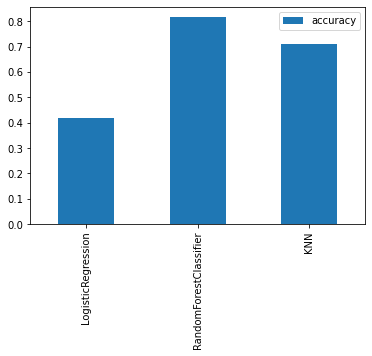

In [47]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar();

In [48]:
# # Set number of rows to use for experimenting
# NUM_Rows = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation score
5. Precision
6. Recall
7. F1-score
8. Classification report
9. Reciever Operating Charactersticts (ROC) Curve
10. Area under the curve(AUC)

**`Hyperparameter Tuning (by hand)`**

In [49]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values of hyperparameter tuning
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier();

# Loop through n neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm 
    knn.fit(X_train, y_train)
    
    # Update training score list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test score list
    test_scores.append(knn.score(X_test, y_test))

<ipython-input-49-1f6be98aabc4>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-49-1f6be98aabc4>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-49-1f6be98aabc4>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-49-1f6be98aabc4>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-49-1f6be98aabc4>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

In [50]:
train_scores

[0.9935209404897244,
 0.9099023092032613,
 0.886829821263954,
 0.8450563375234943,
 0.8177687148399454,
 0.7836143966070446,
 0.7594408920189323,
 0.7322933395007639,
 0.7110287339285772,
 0.69152640648362,
 0.6750404737629035,
 0.6593330705660463,
 0.647039470469626,
 0.6354625084286407,
 0.6246021844430908,
 0.6150513536315634,
 0.6070868988791129,
 0.5989563143956298,
 0.5928486036958979,
 0.5850535361201867]

In [51]:
test_scores

[0.8212939316551137,
 0.7907545907819531,
 0.7708865377599416,
 0.7360680408609996,
 0.7103703028091938,
 0.6824303782074669,
 0.6630487656573026,
 0.6414249665572176,
 0.623996716526815,
 0.6093959017390247,
 0.5973412987960598,
 0.5848838623373465,
 0.5760139243585066,
 0.5673568040861,
 0.5596117596984069,
 0.5532348291377842,
 0.5479447890064454,
 0.5411802261948194,
 0.5372735011552962,
 0.531063784506871]

Maximum Knn score on the test data: 82.13%


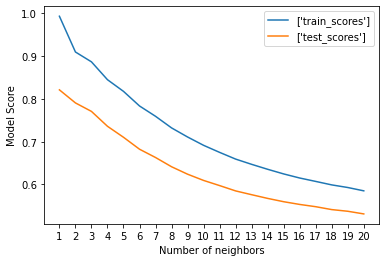

In [52]:
plt.plot(neighbors, train_scores, label=["train_scores"])
plt.plot(neighbors, test_scores, label=["test_scores"])
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.xticks(np.arange(1, 21, 1))
print(f"Maximum Knn score on the test data: {max(test_scores)*100:.2f}%")

**Hypertuning RandomForest**

In [53]:
grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth":[None, 5, 10, 20, 30],
        "max_features":["auto", "sqrt"],
        "min_samples_split":[2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Setup the randomseed
np.random.seed(42)

# Split into X&Y

X = final_data.drop("STATUS", axis=1)
y = final_data[["STATUS"]]

# Split into train & test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

# Instantiate our model
rfc=RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train, y_train)

# Setup RandomizedSearchCV
rs_rfc = RandomizedSearchCV(estimator = rfc,
                            param_distributions = grid,
                            n_iter = 10, # numbers of models to try
                            cv=5,
                            verbose=2)

<ipython-input-53-333d4977e373>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [54]:
# Fit the RandomizedSearchCV version of rfc
rs_rfc.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total= 7.7min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.7min remaining:    0.0s


[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total= 7.0min
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total= 6.1min
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total= 6.0min
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total= 6.2min
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   2.5s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   2.4s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   2.5s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   2.4s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   2.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30, total= 6.8min
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30, total= 6.8min
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30, total= 6.8min
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30, total= 7.1min
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30, total= 7.2min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=  32.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=  30.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=  29.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=  35.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=  30.5s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total= 2.5min
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total= 2.7min
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total= 2.5min
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total= 2.4min
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total= 2.4min
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=10, total= 2.4min
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=10, total= 2.4min
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=10, total= 2.4min
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=10, total= 2.4min
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=10 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=10, total= 2.4min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, total= 1.0min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, total= 1.0min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, total= 1.1min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, total= 1.2min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, total= 1.0min
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None, total= 1.1min
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None, total= 1.1min
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None, total= 1.1min
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None, total= 1.1min
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None, total= 1.1min
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, total=   4.1s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, total=   4.3s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, total=   4.1s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, total=   4.1s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, total=   4.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   4.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   4.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   4.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   4.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   4.2s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 106.6min finished
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [55]:
rs_rfc.score(X_test,y_test)

0.8079282196278731

In [56]:
rs_rfc.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [57]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anac

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: Dat

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: Dat

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: Dat

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [58]:
rs_rf.score(X_test,y_test)

0.7930613827070412

In [62]:
# Make predictions with tuned model
y_preds = rs_rfc.predict(X_test)
y_preds

array([6, 6, 6, ..., 0, 0, 7], dtype=int8)

In [70]:
X_test

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,MONTHS_BALANCE,CODE_GENDER_is_missing,FLAG_OWN_CAR_is_missing,FLAG_OWN_REALTY_is_missing,NAME_INCOME_TYPE_is_missing,NAME_EDUCATION_TYPE_is_missing,NAME_FAMILY_STATUS_is_missing,NAME_HOUSING_TYPE_is_missing,OCCUPATION_TYPE_is_missing,STATUS_is_missing
284481,0,0,1,0,90000.0,1,4,2,1,-23010,...,-17,False,False,False,False,False,False,False,True,False
203727,0,0,1,1,81000.0,4,4,1,1,-16812,...,-13,False,False,False,False,False,False,False,False,False
233631,1,0,1,1,189000.0,4,4,1,1,-13516,...,-33,False,False,False,False,False,False,False,True,False
7505,1,0,1,0,360000.0,0,4,1,1,-12483,...,-26,False,False,False,False,False,False,False,False,False
192047,0,1,1,0,112500.0,1,4,1,1,-21220,...,-19,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109721,0,0,1,2,157500.0,0,4,1,1,-13215,...,-27,False,False,False,False,False,False,False,False,False
304685,1,1,1,2,180000.0,4,1,1,1,-11483,...,-27,False,False,False,False,False,False,False,False,False
172525,1,1,1,0,270000.0,4,4,3,1,-16616,...,-51,False,False,False,False,False,False,False,False,False
195462,0,0,0,2,157500.0,4,4,1,1,-11295,...,-32,False,False,False,False,False,False,False,False,False


In [73]:
print(confusion_matrix(y_test, y_preds))

[[25496    69     2     0     0     0  4808  1416]
 [  577    79     4     0     0     0   190    27]
 [   30    10     6     1     0     0    18     2]
 [    7     1     8     0     1     0     7     1]
 [    1     0     0     1     0     5     9     1]
 [   17     0     0     0     3    63    44     2]
 [ 2470     7     0     0     0     2 34019   278]
 [ 3692     4     0     0     0     1  3131 11202]]


In [83]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80     31791
           1       0.46      0.09      0.15       877
           2       0.30      0.09      0.14        67
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        17
           5       0.89      0.49      0.63       129
           6       0.81      0.93      0.86     36776
           7       0.87      0.62      0.72     18030

    accuracy                           0.81     87712
   macro avg       0.51      0.38      0.41     87712
weighted avg       0.81      0.81      0.80     87712



In [60]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test, y_preds)

NameError: name 'y_preds' is not defined

In [61]:
gs_y_preds = gs_rfc.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

NameError: name 'gs_rfc' is not defined

In [84]:
# Make a copy
final_data_tmp = final_data.copy()

In [87]:
final_data_tmp.head().T

,0,1,2,3,4
CODE_GENDER,1,1,1,0,0
FLAG_OWN_CAR,1,1,1,0,0
FLAG_OWN_REALTY,1,1,1,1,1
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500,427500,112500,270000,270000
NAME_INCOME_TYPE,4,4,4,0,0
NAME_EDUCATION_TYPE,1,1,4,4,4
NAME_FAMILY_STATUS,0,0,1,3,3
NAME_HOUSING_TYPE,4,4,1,1,1
DAYS_BIRTH,-12005,-12005,-21474,-19110,-19110


In [89]:
final_data_tmp.shape

(438557, 27)

In [90]:
final_data_tmp.drop(final_data_tmp.columns[[18, 19, 20, 21, 22, 23, 24, 25, 26]], axis = 1, inplace = True)

In [91]:
final_data_tmp.shape

(438557, 18)

In [93]:
final_data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          438557 non-null  int8   
 1   FLAG_OWN_CAR         438557 non-null  int8   
 2   FLAG_OWN_REALTY      438557 non-null  int8   
 3   CNT_CHILDREN         438557 non-null  int64  
 4   AMT_INCOME_TOTAL     438557 non-null  float64
 5   NAME_INCOME_TYPE     438557 non-null  int8   
 6   NAME_EDUCATION_TYPE  438557 non-null  int8   
 7   NAME_FAMILY_STATUS   438557 non-null  int8   
 8   NAME_HOUSING_TYPE    438557 non-null  int8   
 9   DAYS_BIRTH           438557 non-null  int64  
 10  DAYS_EMPLOYED        438557 non-null  int64  
 11  FLAG_WORK_PHONE      438557 non-null  int64  
 12  FLAG_PHONE           438557 non-null  int64  
 13  FLAG_EMAIL           438557 non-null  int64  
 14  OCCUPATION_TYPE      438557 non-null  int8   
 15  CNT_FAM_MEMBERS  

In [94]:
np.random.seed(42)

X=final_data_tmp.drop("STATUS", axis=1)
y=final_data_tmp[["STATUS"]]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

rfc = RandomForestClassifier()


rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test[:5])
y_pred

rfc.predict_proba(X_test[:5])

# cross_val_score = cross_val_score(svc, X, y, cv=5)

array([[0.16, 0.  , 0.  , 0.  , 0.  , 0.  , 0.81, 0.03],
       [0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.78, 0.02],
       [0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.71, 0.18],
       [0.87, 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.07],
       [0.76, 0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.01]])

In [95]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestResgresssor hyperparameters

rf_grid = {"n_estimators":np.arange(10, 100, 10),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2),
          "max_features" : [0.5, 1, "sqrt", "auto"],
          "max_samples" : [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,
                                                   random_state=42),
                              param_distributions = rf_grid,
                              n_iter = 5,
                              cv = 5,
                              verbose = True)

rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   50.7s finished


CPU times: user 31.3 s, sys: 4.09 s, total: 35.4 s
Wall time: 53 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [96]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}